In [8]:
import pandas as pd

In [9]:
import numpy as np

In [22]:
import seaborn as sns

In [23]:
import matplotlib.pyplot as plt

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
from sklearn.naive_bayes import MultinomialNB

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
from sklearn.svm import LinearSVC

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
import joblib

In [24]:
from sklearn.decomposition import PCA

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [18]:
df = pd.read_csv('C:/Users/TANUSHRI/OneDrive/Desktop/new/spam.csv', encoding='latin-1')[['v1', 'v2']]

In [19]:
df.columns = ['label', 'message']

In [20]:
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

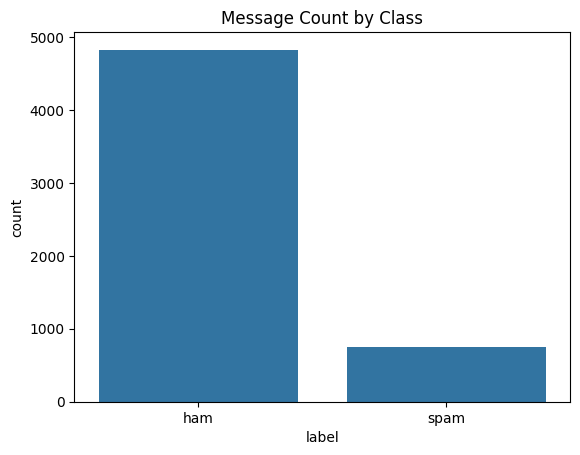

In [27]:
sns.countplot(x='label', data=df)
plt.title("Message Count by Class")
plt.show()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label_num'], test_size=0.2, random_state=42, stratify=df['label_num']
)

In [39]:
models = {
    "MultinomialNB": MultinomialNB(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "LinearSVC": LinearSVC(),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [40]:
for name, clf in models.items():
    clf.fit(X_train_vec, y_train)
    y_pred = clf.predict(X_test_vec)
    acc = accuracy_score(y_test, y_pred)

In [41]:
print(f"\n{name} Accuracy: {round(acc * 100, 2)}%")


RandomForest Accuracy: 97.49%


In [42]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.81      0.90       149

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



In [43]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[966   0]
 [ 28 121]]


In [44]:
cv_scores = cross_val_score(MultinomialNB(), X_train_vec, y_train, cv=5)

In [45]:
print("\nCross-validation Accuracy: %.2f%% (+/- %.2f%%)" % (cv_scores.mean()*100, cv_scores.std()*100))


Cross-validation Accuracy: 96.70% (+/- 0.65%)


In [77]:
vectorizer = TfidfVectorizer(stop_words='english')

In [78]:
X_train_vec = vectorizer.fit_transform(X_train)

In [79]:
X_test_vec = vectorizer.transform(X_test)

In [48]:
model = MultinomialNB()

In [49]:
model.fit(X_train_vec, y_train)

MultinomialNB()

In [80]:
def predict_message(text):
    vec = vectorizer.transform([text])
    pred = model.predict(vec)
    return "Spam" if pred[0] == 1 else "Ham"

In [81]:
X_vec = vectorizer.transform(df['message'])

In [82]:
from sklearn.decomposition import PCA

In [83]:
from sklearn.cluster import KMeans

In [50]:
feature_names = vectorizer.get_feature_names_out()

In [84]:
pca = PCA(n_components=2)

In [85]:
X_reduced = pca.fit_transform(X_vec.toarray())

In [51]:
top_spam = np.argsort(model.feature_log_prob_[1])[-20:]

In [52]:
top_ham = np.argsort(model.feature_log_prob_[0])[-20:]

In [53]:
print("\nTop Spam Words:", [feature_names[i] for i in top_spam])


Top Spam Words: ['contact', 'nokia', 'win', '150p', 'new', 'urgent', 'service', 'uk', 'won', 'cash', 'prize', 'www', 'reply', 'ur', 'text', 'stop', 'mobile', 'claim', 'txt', 'free']


In [54]:
print("Top Ham Words:", [feature_names[i] for i in top_ham])

Top Ham Words: ['day', 'ur', 'want', 'da', 'going', 'lor', 'time', 'like', 'good', 'later', 'sorry', 'know', 'home', 'got', 'just', 'come', 'lt', 'gt', 'll', 'ok']


In [55]:
X_vec = vectorizer.fit_transform(df['message'])

In [56]:
pca = PCA(n_components=2)

In [57]:
X_reduced = pca.fit_transform(X_vec.toarray())

In [58]:
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

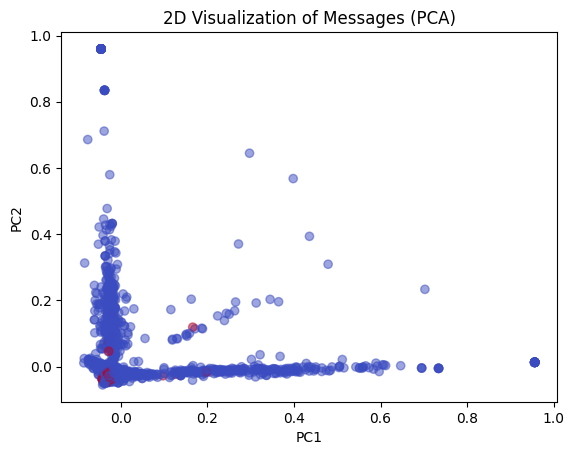

In [59]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df['label_num'], cmap='coolwarm', alpha=0.5)
plt.title("2D Visualization of Messages (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [69]:
from sklearn.cluster import KMeans

In [70]:
kmeans = KMeans(n_clusters=2, random_state=42)

In [71]:
df['cluster'] = kmeans.fit_predict(X_vec)

In [72]:
print(df[['message', 'label', 'cluster']].head())

                                             message label  cluster
0  Go until jurong point, crazy.. Available only ...   ham        0
1                      Ok lar... Joking wif u oni...   ham        0
2  Free entry in 2 a wkly comp to win FA Cup fina...  spam        0
3  U dun say so early hor... U c already then say...   ham        0
4  Nah I don't think he goes to usf, he lives aro...   ham        0


In [73]:
joblib.dump(model, 'spam_model.pkl')

['spam_model.pkl']

In [74]:
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [86]:
print("\nPrediction Example:", predict_message("You won a $1000 prize! Click now."))


Prediction Example: Spam


In [87]:
print(predict_message("Congratulations! You've been selected for a free cruise."))

Ham


In [88]:
print(predict_message("Hey, are we still meeting at 5?"))

Ham
